<a href="https://colab.research.google.com/github/mingxieirene/DABP14000_Fall2022/blob/main/Pandas_DABP14000_Final_Project_vr2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pandas! - DABP14000 - 17 September 2022**

Group Members: 

Przemyslaw Zajac,
Ming Xie,
Erin Criste 


[Project URL](https://github.com/mingxieirene/DABP14000_Fall2022/blob/main/Pandas_DABP14000_Final_Project_FINAL.ipynb) 

[Presentation video URL](https://drive.google.com/file/d/1mLjJ1V1erpRCGJ2qnPUGC_ujPZhwFaJ4/view?usp=sharing) 

# **Project Summary** 

## Project Goal:

This project is designed to identify the possible factors that affect the full-time data scientists’ salaries in US and predict the salaries based on the employee’s features (experience level, job title, residence, etc.) and the employer’s features (company size, remote ratio, etc.). The project goal is to estimate how much salary a data scientist employee can expect to get as accurately as possible using statistical models based on their professional situation. 

## Project target audience:

This project is meant to benefit the people who are interested in starting their career in the data science field like new grads with data-related majors, and who have been working as a data scientist and looking for career development. They can evaluate their current offer, predict their future income and improve their career plans by using this project. 

The project can also benefit a variety of employers that plan to hire data scientist employees to estimate the hiring costs. 




In [ ]:
# Allows multiple outputs from a single cell:
from IPython.core.interactiveshell import InteractiveShell as IS; IS.ast_node_interactivity = "all"
!pip -q install -U statsmodels > log.txt   # ensures no FutureWarnings from statsmodels

import numpy as np, pandas as pd, matplotlib.pyplot as plt, scipy, seaborn as sns, statsmodels.api as sm, pprint
import sklearn, platform, matplotlib, datetime
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


#Point to github repo for datasource
url = 'https://raw.githubusercontent.com/erinlc27/DABP14000_Fall2022/main/ds_salaries.csv'

df = pd.read_csv(url)

In [ ]:
#Print list of columns
print(list(df.columns))

['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


In [ ]:
#Drop duplicate index imported
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
#Display 1st 10 observations
display(df.iloc[:10])

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [ ]:
#Look at column types
print(display(df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


None

None


#**Exploratory Data Analysis (EDA)**

#1. Dataset Description 

###*Data Scientist Job Salaries: Click here to view/download [dataset](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)*

## The Data Scientist Job Salaries dataset was downloaded from Kaggle and contains 607 observations and 12 columns. Each observation provides the employment details of data scientists including experience, salary, and job title to name a few. See below for the column names and description.

*   work_year - The year the salary was paid.
*   experience_level - The experience level in the job during the year with the following possible values: EN Entry-level, Junior MI Mid-level, Intermediate SE Senior-level, Expert EX Executive-level, and Director
*   employment_type - The type of employment for the role: PT Part-time FT, FT Full-time, CT Contract, and FL Freelance
*   job_title - The role worked in during the year.
*   salary - The total gross salary amount paid.
*   salary_currency - The currency of the salary paid as an ISO 4217 currency code.
*   salaryinusd - The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
*   employee_residence - Employee's primary country of residence in during the work year as an ISO 3166 country code.
*   remote_ratio - The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%), 50 Partially remote, and 100 Fully remote (more than 80%)
*   company_location - The country of the employer's main office or contracting branch as an ISO 3166 country code.
*   company_siz - The average number of people that worked for the company during the year: S less than 50 employees (small), M 50 to 250 employees (medium), and L more than 250 employees (large)


The dependent variable used for this analysis is the **SALARY in USD**.

In [ ]:
#Filter dataset to Full Time Employment & company location of US
#Full time employment covers 588 out of 607 observations in the dataset thus we felt it represents most of our observations and filtered out Non-FT observations
#In the initial model we are are only going to explore US companies Data Scientist salary data
df_flt = df.loc[ (df['employment_type'] == 'FT') & (df['company_location'] == 'US') ]
df_flt = df_flt.drop(['salary'], axis=1) #Drop salary column as our dependant variable will be salary in USD

In [ ]:
#Look at high level data stats
dfStat = df_flt.describe()
#Drop count stat
dfStat.drop(index=['count'],inplace=True)
#Drop work_year column, stats for this column are not that informative
dfStat.drop(columns=['work_year'],inplace=True)

dfStat.loc['IQR'] = dfStat.loc['75%'] - dfStat.loc['25%']
dfStat = dfStat.append(df.reindex(dfStat.columns, axis=1).agg(['skew', 'mad', 'kurt']))

mapper = {'salary':'{0:.2f}', 'salary_in_usd':'{0:.2f}', 'remote_ratio':'{0:.0f}'}
print(display(dfStat.style.format(mapper)))

,salary_in_usd,remote_ratio
mean,144637.62,77
std,67616.06,40
min,5679.00,0
25%,102100.00,50
50%,136300.00,100
75%,170000.00,100
max,600000.00,100
IQR,67900.00,50
skew,1.67,-1
mad,52584.27,37


None


In [ ]:
#Look at column types
print(display(df_flt.info()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 4 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           346 non-null    int64 
 1   experience_level    346 non-null    object
 2   employment_type     346 non-null    object
 3   job_title           346 non-null    object
 4   salary_currency     346 non-null    object
 5   salary_in_usd       346 non-null    int64 
 6   employee_residence  346 non-null    object
 7   remote_ratio        346 non-null    int64 
 8   company_location    346 non-null    object
 9   company_size        346 non-null    object
dtypes: int64(3), object(7)
memory usage: 29.7+ KB


None

None


#2. Dataset Features
###To analyze our dataset for our problem statement, we chose to filter to full time employment observations only. Full time employment covers 588 out of 607 observations in the dataset thus we felt it represents most of our observations. We filtered the data to include ONLY United States (US) observations which resulted in 346 records from the overall 607. To reduce the complexity of the initial model, we chose to only concentrate on US based employers. We also removed salary feature as our dependent variable will be salary in USD.

###In addition, there were no NULL or missing values in this dataset.

#3. Data Types
###The dataset contains several categorical variables that increase the complexity of the analysis including Experience Level (4 types), Remote Ratio (3 types), Company Size (3 types), and Job Title (40 types). For initial modeling purposes, we will exclude the job titles for easier analysis. The experience level and company size will likely need to be categorized into numeric values for the analysis. 

###From initial exploration of the dataset, we believe that the variables including experience level, salaries in USD, remote ratio, and company size will be the ones to drive our analysis.


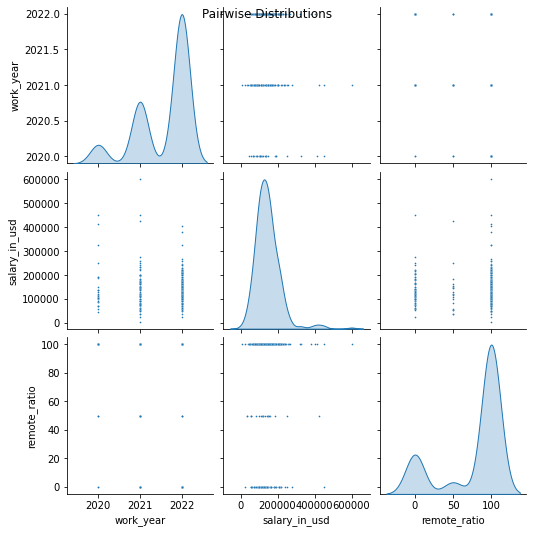

In [ ]:
#look at KDE Plot
pair_plot = sns.pairplot(df_flt, diag_kind='kde',plot_kws={"s": 3});
pair_plot.fig.suptitle("Pairwise Distributions");

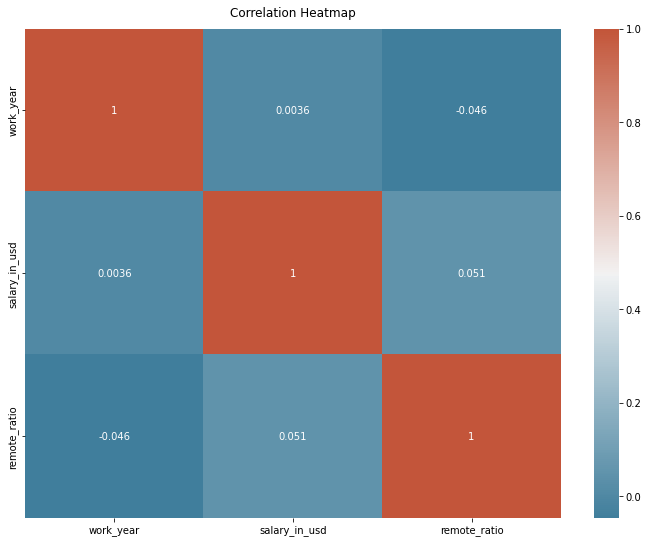

In [ ]:
#Look at correlation matrix for continious variables
plt.figure(figsize=(12, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap = sns.heatmap(df_flt.corr(),annot=True, fmt='.2g', cmap=cmap)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


#4. Correlation
Correlation matrix, histograms, scatterplots, and heatmaps were used to further explore the filtered dataset to begin our initial modeling and analysis.

###Histograms and Scatterplots
The Histograms show skew within the dataset. Work year and remote ratio both are multi-modal plots. This makes sense as these features are categorical variables represented by numeric.

Salary_in_USD has right skew with long tail. 

From the scatterplots, there does not appear to be any linear relationships within the data.

###Correlation Matrix Heatmaps
From the correlation matrix in above heatmap, we see no linear correlation with the data (extremely low R-values).

#**Baseline Model**

In [ ]:
#Build simple linear regression baseline model

#Filter dataframe to columns that will be used to build regression model
df_slrm = df_flt.drop(columns=['work_year','employment_type','job_title','salary_currency','employee_residence','company_location'])

#Define response variable
Y = df_slrm['salary_in_usd']

#Drop response variable from feature set
X = df_slrm.drop(['salary_in_usd'], axis=1)

#Encode categorical feature and drop one column do to multi-collinearity
dummy_experience = pd.get_dummies(X['experience_level'], prefix='exp', drop_first=True)
dummy_compsize = pd.get_dummies(X['company_size'], prefix='size', drop_first=True)

#Drop columns that are replaced by dummy variables
X.drop(columns=['experience_level','company_size'],inplace=True)

#Assign dummy variables back to the dataframe
X = X.join(dummy_experience)
X = X.join(dummy_compsize)

#Split observations
tX, vX, tY, vY = tts(X, Y, test_size = 0.2, random_state=0)
#Fit the model
mdl = sm.OLS(tY, tX).fit()
#Print OLS Regression summary with significance level of 5%
print(mdl.summary(title='Baseline Model for Full Time Data Scientist Salary in US', alpha=.05))
#Predict salaries using test set 
pY = mdl.predict(vX)
#Compute out-of-sample R^2
print(f'Out of sample R^2 is {r2_score(vY, pY):.2f}')

                Baseline Model for Full Time Data Scientist Salary in US               
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.818
Method:                 Least Squares   F-statistic:                              207.4
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                    5.05e-98
Time:                        02:08:12   Log-Likelihood:                         -3462.8
No. Observations:                 276   AIC:                                      6938.
Df Residuals:                     270   BIC:                                      6959.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

*   This is poor out-of-sample R2, let's try to add an intercept to the model to see if it improves




##Add intercept to linear regression baseline model

In [ ]:
#Add an intercept to the linear regression model to see if we can improve the out-of-sample R2
#Copy dataframe
X2 = X.copy()

#Define response variable
Y2 = Y.copy()

#Split observations
tX2, vX2, tY2, vY2 = tts(X2, Y2, test_size = 0.2, random_state=0)
#Fit the model
mdl2 = sm.OLS(tY2, sm.add_constant(tX2)).fit()
#Print summary stats
print(mdl2.summary(title='Improvement Linear Regression Model for Full Time Data Scientist Salary in US', alpha=.05))
#Predict market value using test set 
pY2 = mdl2.predict(sm.add_constant(vX2))
#Compute out-of-sample R^2
print(f'Out of sample R^2 is {r2_score(vY2, pY2):.2f}')

Improvement Linear Regression Model for Full Time Data Scientist Salary in US 
Dep. Variable:          salary_in_usd   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     10.71
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           1.12e-10
Time:                        02:08:12   Log-Likelihood:                -3440.1
No. Observations:                 276   AIC:                             6894.
Df Residuals:                     269   BIC:                             6920.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.167e+05   1.69e+04      6.923   

*   Slightly better out-of-sample R2 but still relatively poor model. 

*   We did not use clustering or logistic regression models as we did not feel it fit our problem statement

*   Let's try Decision Tree Regression










##Decision Tree Regression of baseline model

In Sample R2: 0.28041760412318384
Out of Sample R2: 0.05517293047430616
Model Object: DecisionTreeRegressor(random_state=0)
Tree Depth: 7


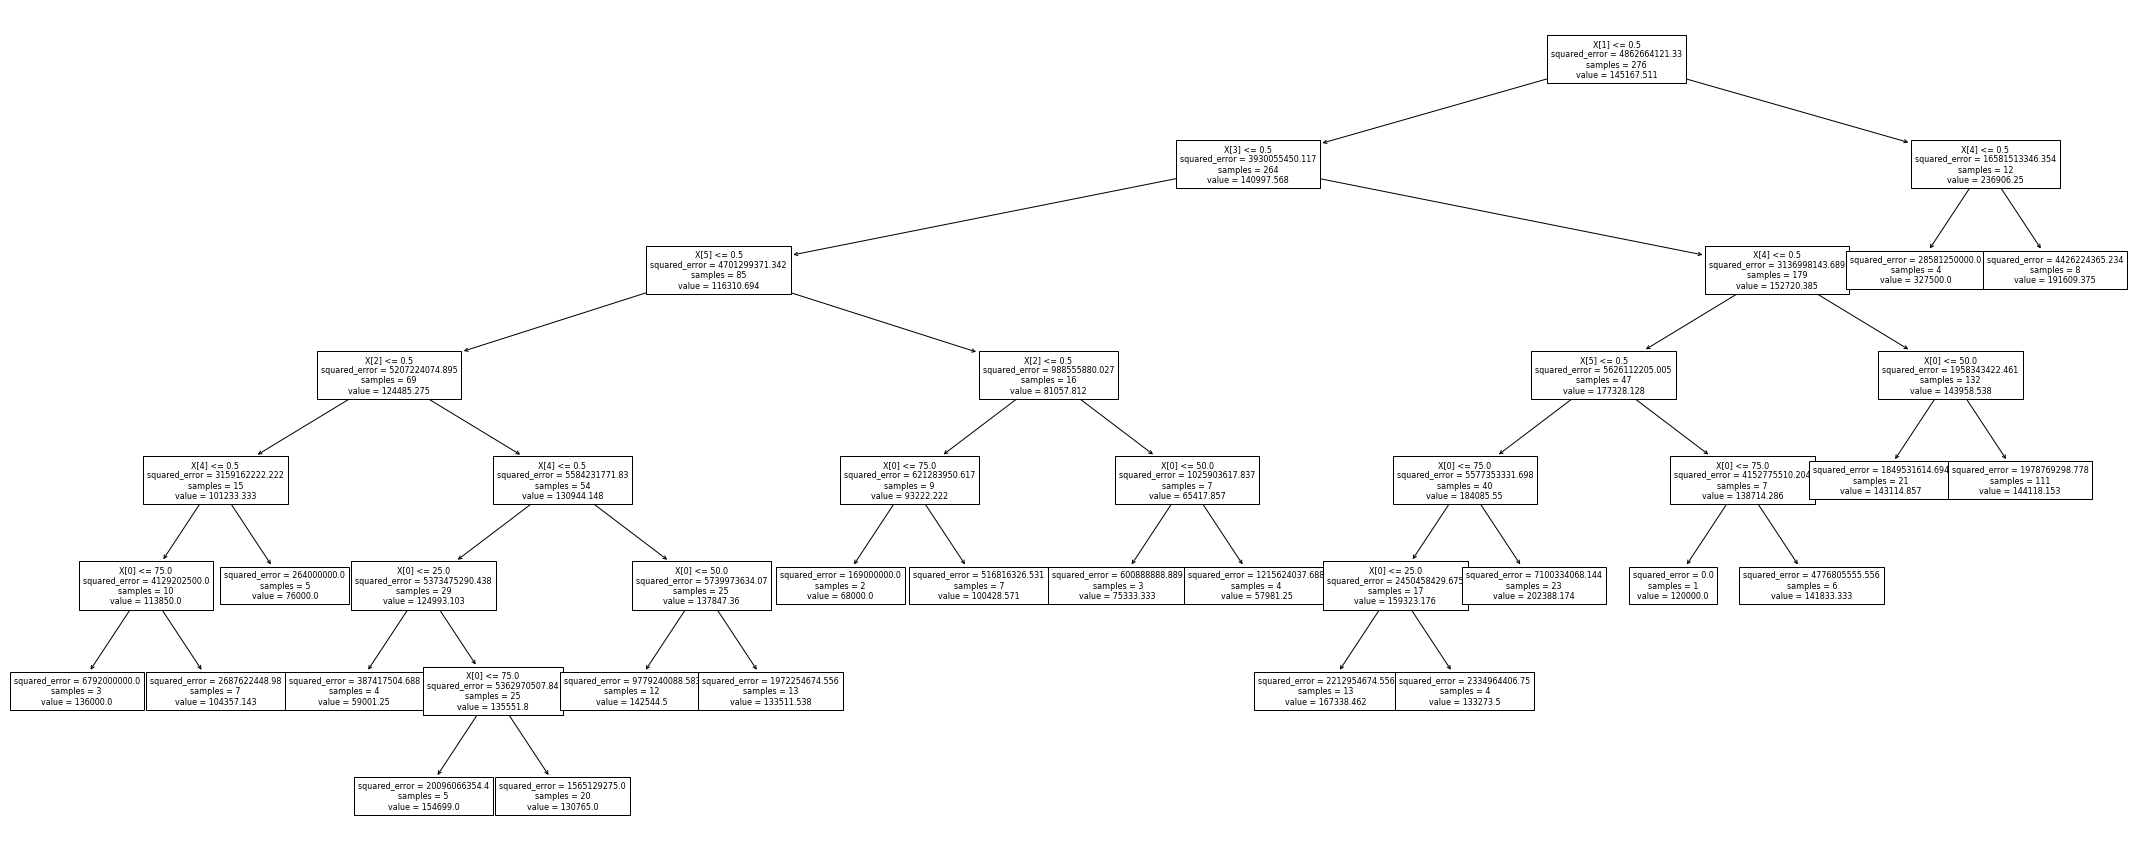

In [ ]:
#Lets try decision tree regressor with default params
#Copy dataframe
X3 = X.copy()

#Define response variable
Y3 = Y.copy()

tX3, vX3, tY3, vY3 = tts(X3, Y3, test_size=0.2, random_state=0)

#Create Decision Tree Regressor object with default params
mdl3 = DecisionTreeRegressor(random_state=0)

#Fit the model
mdl3.fit(tX3, tY3)

#Make in sample predictions
predictions_in3 = mdl3.predict(tX3)

print(f'In Sample R2: {r2_score(tY3, predictions_in3)}')

#Make out of sample predictions 
predictions3 = mdl3.predict(vX3)

#Print out of sample R2
print(f'Out of Sample R2: {r2_score(vY3, predictions3)}')

#Print model 
print(f'Model Object: {mdl3}')

#Print tree depth
print(f'Tree Depth: {mdl3.get_depth()}')

# plot tree
plt.figure(figsize=(30,12))  # set plot size (denoted in inches)
tree.plot_tree(mdl3, fontsize=8);
plt.tight_layout();


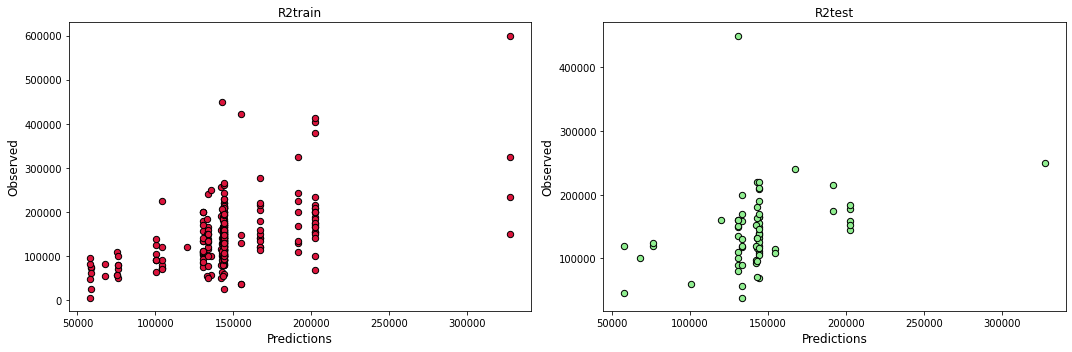

In [ ]:
#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in3, tY3 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions3, vY3, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

•	Decision tree regressor with default parameters did not improve our out-of-sample performance, let’s try to find best parameters for the tree using Grid Search 


##Decision Tree Regression of baseline model using grid search

In [ ]:
#Lets try use grid search to find the best params for the decision tree regressor
#Copy dataframe
X4 = X.copy()

#Define response variable
Y4 = Y.copy()

tX4, vX4, tY4, vY4 = tts(X4, Y4, test_size=0.2, random_state=0)


#Define grid search params
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5,6,7,8,9],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
           "max_features":["auto",1,2,3,"log2","sqrt"],
           }

#Create grid search object with defined params
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),\
                 param_grid = parameters,\
                 scoring = 'r2',\
                 cv=10)

#Fit the model using grid search
gs.fit(tX4, tY4)

#Print out best combination or params
gs.best_params_

#Print out best estimator 
gs.best_estimator_

#Calculate and print in-sample R2
predictions_in4 = gs.predict(tX4)
print(f'\nIn Sample R2: {r2_score(tY4, predictions_in4)}')

#Calculate and print out-of-smaple R2
predictions4 = gs.predict(vX4)
print(f'Out of Sample R2: {r2_score(vY4, predictions4)}')

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 1, 2, 3, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='r2')

{'max_depth': 6, 'max_features': 1, 'min_samples_leaf': 4, 'splitter': 'best'}

DecisionTreeRegressor(max_depth=6, max_features=1, min_samples_leaf=4,
                      random_state=0)


In Sample R2: 0.2722095474830537
Out of Sample R2: 0.049511383243390106


•	Grid search did not improve our out-of-sample R2, let’s try Ensemble Learning methods


##Random Forest Regression of baseline model

In Sample R2: 0.2801200657022236
Out of Sample R2: 0.07057682320553205
Feature Importance: [(0.2525416877710359, 'size_M'), (0.23731935047796382, 'exp_EX'), (0.16688948172760243, 'exp_SE'), (0.15760912366815713, 'remote_ratio'), (0.11648484927372758, 'size_S'), (0.06915550708151305, 'exp_MI')]


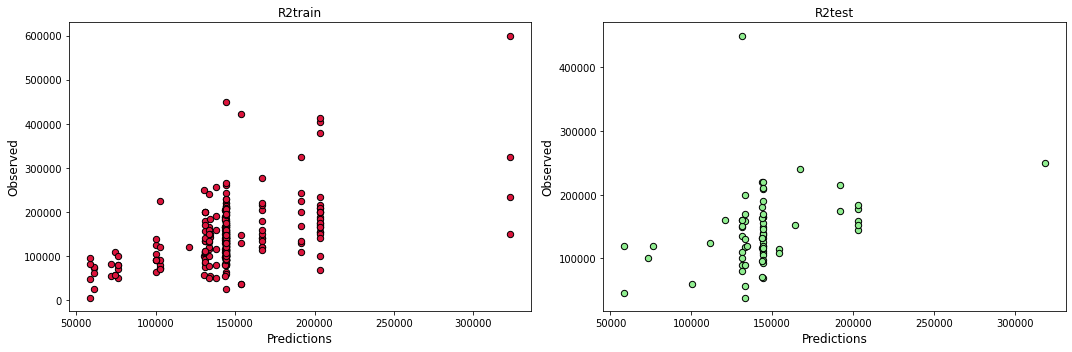

In [ ]:
#Lets try Random Forest Regressor 
#Copy dataframe
X5 = X.copy()

#Define response variable
Y5 = Y.copy()

tX5, vX5, tY5, vY5 = tts(X5, Y5, test_size=0.2, random_state=0)

#Create model object using Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

#Fit the model using grid search
rf_model.fit(tX5, tY5)

#Calculate and print in-sample R2
predictions_in5 = rf_model.predict(tX5)
print(f'In Sample R2: {r2_score(tY5, predictions_in5)}')

#Calculate and print out-of-smaple R2
predictions5 = rf_model.predict(vX5)
print(f'Out of Sample R2: {r2_score(vY5, predictions5)}')

#Lets look at the importance of features in the model
feature_list = []
for name, score in zip(X5.columns, rf_model.feature_importances_):
    feature_list.append((score, name))

sorted(feature_list, reverse=True)
print(f'Feature Importance: {sorted(feature_list, reverse=True)}')

#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in5, tY5 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions5, vY5, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();


•	Slightly better R2 than Decision Tree Regressor but still a poor model, let's try gradient boosting



In Sample R2: 0.27857512501049797
Out of Sample R2: 0.07951053380760131
Feature Importance: [(0.2805454993076739, 'exp_EX'), (0.25197806822812097, 'size_M'), (0.203008113619579, 'exp_SE'), (0.1311729590760252, 'remote_ratio'), (0.09767259649517505, 'size_S'), (0.035622763273425784, 'exp_MI')]


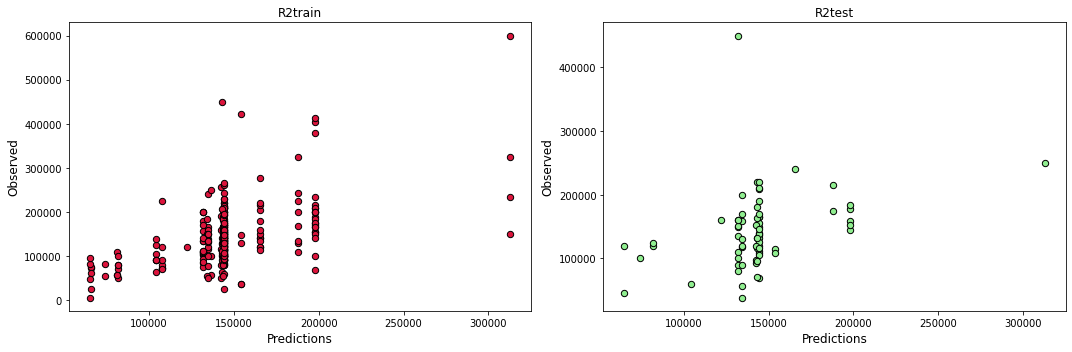

In [ ]:
#Lets try Gradient Boosting
#Copy dataframe
X6 = X.copy()

#Define response variable
Y6 = Y.copy()

tX6, vX6, tY6, vY6 = tts(X6, Y6, test_size=0.2, random_state=0)

#Create model object using Gradient Boosting
gb_model = GradientBoostingRegressor(max_depth=7, n_estimators=250, learning_rate=0.01, random_state=0)

#Fit the model using grid search
gb_model.fit(tX6, tY6)

#Calculate and print in-sample R2
predictions_in6 = gb_model.predict(tX6)
print(f'In Sample R2: {r2_score(tY6, predictions_in6)}')

#Calculate and print out-of-smaple R2
predictions6 = gb_model.predict(vX6)
print(f'Out of Sample R2: {r2_score(vY6, predictions6)}')

#Lets look at the importance of features in the model
feature_list2 = []
for name, score in zip(X6.columns, gb_model.feature_importances_):
    feature_list2.append((score, name))

sorted(feature_list2, reverse=True)
print(f'Feature Importance: {sorted(feature_list2, reverse=True)}')

#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in6, tY6 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions6, vY6, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

•	Slight improvement in out-of-sample R2 but still pretty poor model

•	It may be that there are other features not present in our dataset that have more predictive power to predict data scientist salary in US








#Model Optimization

##Added - Linear Regression optimization

Many of the variables in our dataset are categorical. We took a look at the data and started categorizing the variables into dummy numeric variables. This modification was the first step into categorizing the data for further analysis.

In [ ]:
#Categorize the job types by grouping the job titles
df['job_type'] = pd.np.where(df.job_title.str.contains("Scientist"), "Scientist",
                    pd.np.where(df.job_title.str.contains("Analyst"), "Analyst",
                    pd.np.where(df.job_title.str.contains("Engineer"), "Engineer", "other")))

# #Categorize the country by US and NON-US
df['employee_country'] = pd.np.where(df.employee_residence.str.contains("US"), "US", "NON-US")

# #Get the dummies
exp = np.array(df['experience_level'])
exp_dm = pd.get_dummies(exp, prefix='exp', drop_first=True)

size = np.array(df['company_size'])
size_dm=pd.get_dummies(size, prefix='size', drop_first=True)

jobtype = np.array(df['job_type'])
type_dm=pd.get_dummies(jobtype, prefix='type', drop_first=True)

country = np.array(df['employee_country'])
country_dm = pd.get_dummies(country, prefix='country', drop_first=True)

X = df.drop(['salary_in_usd'], axis=1)
Y = df['salary_in_usd']

X = X.join(exp_dm)
X = X.join(size_dm)
X = X.join(type_dm)
X = X.join(country_dm)

X = X.drop(['job_title', 'salary_currency', 'experience_level', 'employment_type', 'employee_residence', 'company_location', 'job_type' ,'company_size' ,'salary','employee_country'], axis=1)

dfnew = X.join(Y)

#Linear Regression 
Y = dfnew.salary_in_usd
X = dfnew.drop('salary_in_usd', axis=1).fillna(0)
tX, vX, tY, vY = tts(X, Y, test_size = 0.2, random_state=0) # split into train and test sets
mdl = sm.OLS(tY, tX).fit()
pY = mdl.predict(vX)

# Print OLS regression summary
print(mdl.summary(title='', alpha=.01))

#Compute out-of-sample R-squared, R2_score
print(f'Out of sample R^2 is {r2_score(vY, pY):.2f}')

Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.862
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                              268.8
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                   9.04e-196
Time:                        02:09:11   Log-Likelihood:                         -5923.8
No. Observations:                 485   AIC:                                  1.187e+04
Df Residuals:                     474   BIC:                                  1.192e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.005      0.995]
----------------------------------------------------------------------------------
work_year          8.5799      4.873      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  import sys


#Additional Refinements to Analysis

###After reviewing the dataset and initial model, three items to note:
1.   Initial simplified model has low predictive confidence
2.   Possible errors in dataset
3.   Additional categorical variables could be introduced to model

###The salary in USD values ranged from 5679 to 600000 annual salary in USD. Noting the small minimum value for annual salary the group considers this to be in error. Thus, a minimum threshold of $50K was set to account for possible errors in dataset.

###Note that remote ratio while numeric is just categories of 0, 50, and 100. Thus, we categorized this variable for additional analysis.

###In addition, the categorical variables for experience level, company size, job title, etc. were converted to dummy variables to further enhance the model for additional analysis.

###With these additional modifications to dataset, the model was re-evaluated to see if the accuracy is improved.

In [ ]:
#Filter salaries < 50K in US as these do not appearresonable 
df_flt = df.loc[~((df['company_location'] == 'US') & (df['salary_in_usd'] < 50000))]
#df_flt = df.copy()
df_flt = df_flt.drop(['salary'], axis=1) #Drop salary column as our dependant variable will be salary in USD

#Filter dataframe to columns that will be used to build regression model
df_slrm = df_flt.drop(columns=['work_year','salary_currency'])

In [ ]:
#Define response variable
Y = df_slrm['salary_in_usd']

#Drop response variable from feature set
X = df_slrm.drop(['salary_in_usd'], axis=1)

In [ ]:
#Encode categorical feature and drop one column do to multi-collinearity
dummy_experience = pd.get_dummies(X['experience_level'], prefix='exp', drop_first=True)
dummy_compsize = pd.get_dummies(X['company_size'], prefix='size', drop_first=True)
dummy_job = pd.get_dummies(X['job_title'], prefix='job', drop_first=True)
dummy_empc = pd.get_dummies(X['employee_residence'], prefix='empc', drop_first=True)
dummy_empt = pd.get_dummies(X['employment_type'], prefix='empt', drop_first=True)
dummy_compl = pd.get_dummies(X['company_location'], prefix='compl', drop_first=True)
dummy_rmratio = pd.get_dummies(X['remote_ratio'], prefix='remote', drop_first=True)

In [ ]:
#Drop columns that are replaced by dummy variables
X.drop(columns=['experience_level','company_size','job_title','employee_residence','employment_type','company_location','remote_ratio','employee_country','job_type'],inplace=True)

In [ ]:
#Assign dummy variables back to the dataframe
X = X.join(dummy_experience)
X = X.join(dummy_compsize)
X = X.join(dummy_job)
X = X.join(dummy_empc)
X = X.join(dummy_empt)
X = X.join(dummy_compl)
X = X.join(dummy_rmratio)

##Further Analysis of Refined Model

Re-run the analysis from initial modeling on the revised dataset with modifications to determine if model performs better.

In [ ]:
#Try simple regression model
#Split observations
tX, vX, tY, vY = tts(X, Y, test_size = 0.2, random_state=0)

#Fit the model
mdl = sm.OLS(tY, tX).fit()

#Print OLS Regression summary with significance level of 5%
print(mdl.summary(title='Baseline Model for Full Time Data Scientist Salary in US', alpha=.05))

#Predict salaries using test set 
pY = mdl.predict(vX)

#Compute out-of-sample R^2
print(f'Out of sample R^2 is {r2_score(vY, pY):.2f}')

                Baseline Model for Full Time Data Scientist Salary in US               
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              33.48
Date:                Fri, 16 Sep 2022   Prob (F-statistic):                   3.26e-140
Time:                        02:09:12   Log-Likelihood:                         -5690.2
No. Observations:                 476   AIC:                                  1.163e+04
Df Residuals:                     351   BIC:                                  1.215e+04
Df Model:                         125                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

In [ ]:
#Add an intercept to the linear regression model to see if we can improve the out-of-sample R2
#Copy dataframe
X2 = X.copy()

#Define response variable
Y2 = Y.copy()

#Split observations
tX2, vX2, tY2, vY2 = tts(X2, Y2, test_size = 0.2, random_state=0)

#Fit the model
mdl2 = sm.OLS(tY2, sm.add_constant(tX2)).fit()

#Print summary stats
print(mdl2.summary(title='Improvement Linear Regression Model for Full Time Data Scientist Salary in US', alpha=.05))

#Predict market value using test set 
pY2 = mdl2.predict(sm.add_constant(vX2))

#Compute out-of-sample R^2
print(f'Out of sample R^2 is {r2_score(vY2, pY2):.2f}')

Improvement Linear Regression Model for Full Time Data Scientist Salary in US 
Dep. Variable:          salary_in_usd   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     7.613
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           3.20e-51
Time:                        02:09:12   Log-Likelihood:                -5687.6
No. Observations:                 476   AIC:                         1.163e+04
Df Residuals:                     350   BIC:                         1.215e+04
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In Sample R2: 0.8841614443345849
Out of Sample R2: 0.2296647105727817
Model Object: DecisionTreeRegressor(random_state=0)
Tree Depth: 34


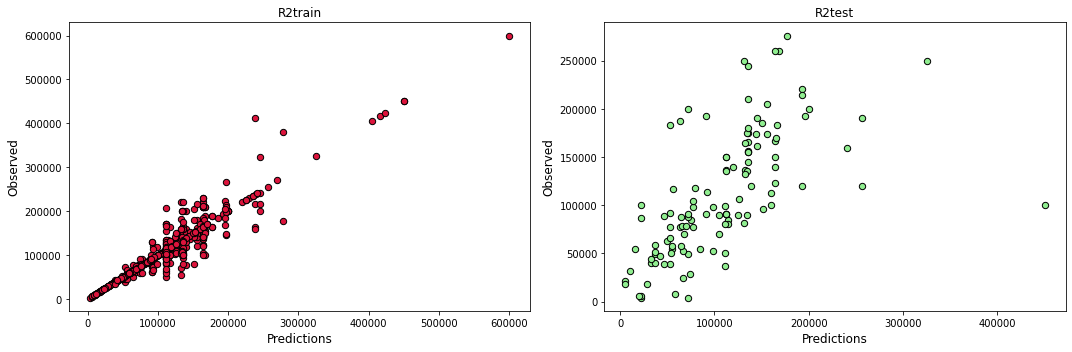

In [ ]:
#Lets try decision tree regressor with default params
#Copy dataframe
X3 = X.copy()

#Define response variable
Y3 = Y.copy()

tX3, vX3, tY3, vY3 = tts(X3, Y3, test_size=0.2, random_state=0)

#Create Decision Tree Regressor object with default params
mdl3 = DecisionTreeRegressor(random_state=0)

#Fit the model
mdl3.fit(tX3, tY3)

#Make in sample predictions
predictions_in3 = mdl3.predict(tX3)

print(f'In Sample R2: {r2_score(tY3, predictions_in3)}')

#Make out of sample predictions 
predictions3 = mdl3.predict(vX3)

#Print out of sample R2
print(f'Out of Sample R2: {r2_score(vY3, predictions3)}')

#Print model 
print(f'Model Object: {mdl3}')

#Print tree depth
print(f'Tree Depth: {mdl3.get_depth()}')

#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in3, tY3 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions3, vY3, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

In [ ]:
#Lets try use grid search to find the best params for the decision tree regressor
#Copy dataframe
X4 = X.copy()

#Define response variable
Y4 = Y.copy()

tX4, vX4, tY4, vY4 = tts(X4, Y4, test_size=0.2, random_state=0)


#Define grid search params
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3,4,5,10,15,20,25],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
           "max_features":["auto",10,20,30,40,50,"log2","sqrt"],
           }

#Create grid search object with defined params
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),\
                 param_grid = parameters,\
                 scoring = 'r2',\
                 cv=10)

#Fit the model using grid search
gs.fit(tX4, tY4)

#Print out best combination or params
gs.best_params_

#Print out best estimator 
gs.best_estimator_

#Calculate and print in-sample R2
predictions_in4 = gs.predict(tX4)
print(f'In Sample R2: {r2_score(tY4, predictions_in4)}')

#Calculate and print out-of-smaple R2
predictions4 = gs.predict(vX4)
print(f'Out of Sample R2: {r2_score(vY4, predictions4)}')

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 10, 20, 30, 40, 50, 'log2',
                                          'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='r2')

{'max_depth': 15,
 'max_features': 40,
 'min_samples_leaf': 3,
 'splitter': 'best'}

DecisionTreeRegressor(max_depth=15, max_features=40, min_samples_leaf=3,
                      random_state=0)

In Sample R2: 0.4826608939431142
Out of Sample R2: 0.41077798665950493


In Sample R2: 0.8346138549124879
Out of Sample R2: 0.4359481855526811


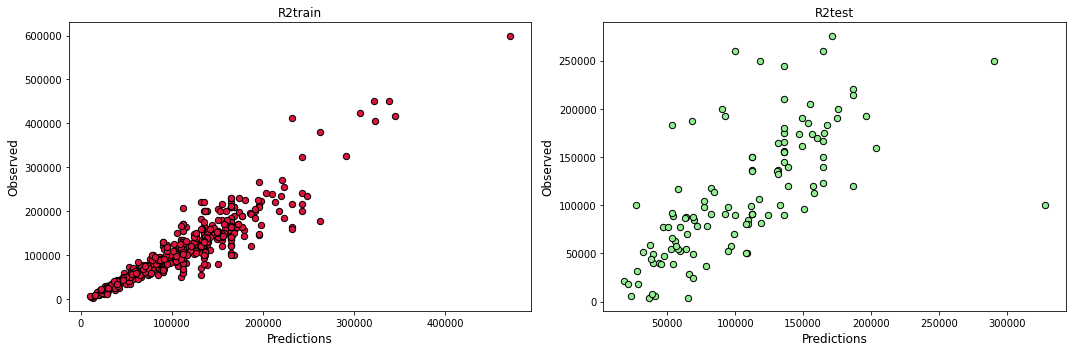

In [ ]:
#Lets try Random Forest Regressor 
#Copy dataframe
X5 = X.copy()

#Define response variable
Y5 = Y.copy()

tX5, vX5, tY5, vY5 = tts(X5, Y5, test_size=0.2, random_state=0)

rf_model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

#Fit the model using grid search
rf_model.fit(tX5, tY5)

#Calculate and print in-sample R2
predictions_in5 = rf_model.predict(tX5)
print(f'In Sample R2: {r2_score(tY5, predictions_in5)}')

#Calculate and print out-of-smaple R2
predictions5 = rf_model.predict(vX5)
print(f'Out of Sample R2: {r2_score(vY5, predictions5)}')

#Lets look at the importance of features in the model
feature_list = []
for name, score in zip(X5.columns, rf_model.feature_importances_):
    feature_list.append((score, name))

sorted(feature_list, reverse=True)
#print(f'Feature Importance: {sorted(feature_list, reverse=True)}')

#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in5, tY5 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions5, vY5, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

In Sample R2: 0.7900023623908479
Out of Sample R2: 0.35804564920270143


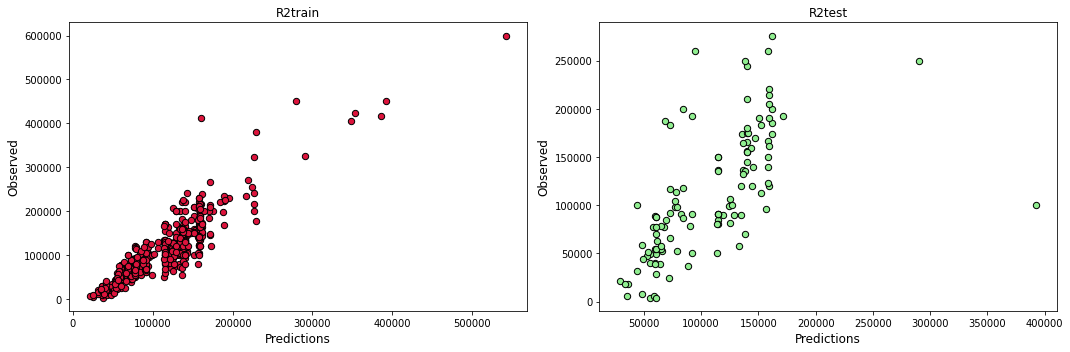

In [ ]:
#Lets try Random Gradient Boosting
#Copy dataframe
X6 = X.copy()

#Define response variable
Y6 = Y.copy()

tX6, vX6, tY6, vY6 = tts(X6, Y6, test_size=0.2, random_state=0)

gb_model = GradientBoostingRegressor(max_depth=7, n_estimators=250, learning_rate=0.01, random_state=0)

#Fit the model using grid search
gb_model.fit(tX6, tY6)

#Calculate and print in-sample R2
predictions_in6 = gb_model.predict(tX6)
print(f'In Sample R2: {r2_score(tY6, predictions_in6)}')

#Calculate and print out-of-smaple R2
predictions6 = gb_model.predict(vX6)
print(f'Out of Sample R2: {r2_score(vY6, predictions6)}')

#Lets look at the importance of features in the model
feature_list2 = []
for name, score in zip(X6.columns, gb_model.feature_importances_):
    feature_list2.append((score, name))

sorted(feature_list2, reverse=True)


#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in6, tY6 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions6, vY6, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

##Grid Search to Determine Best Params 

###The code below is commented out because of the 45 minute run time. The code was used to determine the best parameters for use in the Random Forest Regression that is performed below.

In [ ]:
# #Lets try use grid search to find the best params for the random forest regressor

# #Copy dataframe
# X7 = X.copy()

# #Define response variable
# Y7 = Y.copy()

# tX7, vX7, tY7, vY7 = tts(X7, Y7, test_size=0.2, random_state=0)

# #Define grid search params
# parameters={
#             #"n_estimators" : [500],
#             "max_depth" : [1,2,3,4,5,10,15,20,25,30,35,40,50],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
#            "max_features":["auto",10,20,30,40,50,100,150,175,"log2","sqrt"],
#            }

# #Create grid search object with defined params
# gs2 = GridSearchCV(estimator=RandomForestRegressor(random_state=0),\
#                  param_grid = parameters,\
#                  scoring = 'r2',\
#                  cv=15)

# #Fit the model using grid search
# gs2.fit(tX7, tY7)

# #Print out best combination or params
# gs2.best_params_

# #Print out best estimator
# gs2.best_estimator_

# #Calculate and print in-sample R2
# predictions_in7 = gs2.predict(tX7)
# print(f'In Sample R2: {r2_score(tY7, predictions_in7)}')

# #Calculate and print out-of-smaple R2
# predictions7 = gs2.predict(vX7)
# print(f'Out of Sample R2: {r2_score(vY7, predictions7)}')

##Random Forest Regression

Using best parameters from above, we used Random Forest Regressor to train the model for use on the test sample.

In Sample R2: 0.6519522004799493
Out of Sample R2: 0.5556797415285986
Mean Absolute Error: 31228.02 degrees.
Accuracy: 35.98 %.


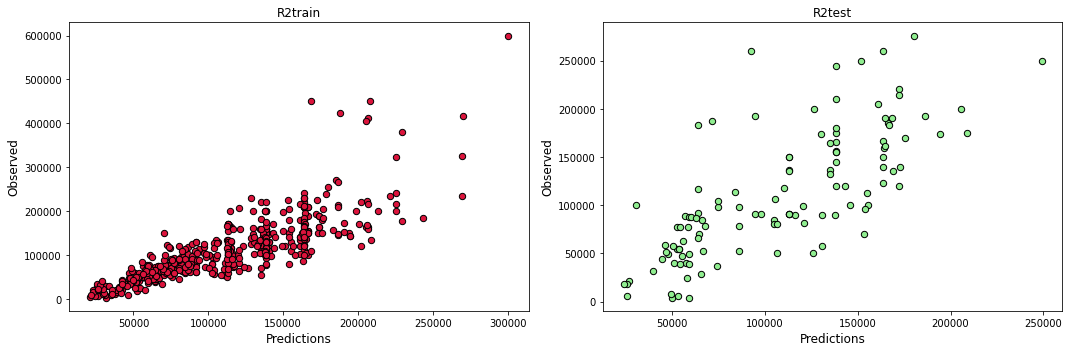

In [ ]:
from sklearn.metrics import mean_squared_error
import math
#Lets try Random Forest Regressor with best params found through grid search above
#Copy dataframe
X8 = X.copy()

#Define response variable
Y8 = Y.copy()

tX8, vX8, tY8, vY8 = tts(X8, Y8, test_size=0.2, random_state=0)

rf_model1 = RandomForestRegressor(max_depth=20, max_features=50, min_samples_leaf=2,
                      random_state=0
)

#Fit the model using grid search
rf_model1.fit(tX8, tY8)

#Calculate and print in-sample R2
predictions_in8 = rf_model1.predict(tX8)
print(f'In Sample R2: {r2_score(tY8, predictions_in8)}')

#Calculate and print out-of-smaple R2
predictions8 = rf_model1.predict(vX8)
print(f'Out of Sample R2: {r2_score(vY8, predictions8)}')

# Calculate the absolute errors
errors = abs(predictions8 - vY8)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / vY8)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

#Lets look at the importance of features in the model
feature_list = []
for name, score in zip(X8.columns, rf_model1.feature_importances_):
    feature_list.append((score, name))

sorted(feature_list, reverse=True)


#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in8, tY8 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions8, vY8, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

##XGBoost Regressor

Let's try enhancing analysis using XGBoost. This enhancement should improve the accuracy of our model.

Gradient boosting trees can be more accurate than random forest. Because with gradient boosting the model is trained where trees correct each other's errors and thus capable of capturing complex patterns in the data. However, if the there is noise in the data then the boosted trees may overfit and start modeling the noise, so something to consider in our model.

One of the most important differences between XG Boost and Random forest is that the XGBoost always gives more importance to functional space while Random Forest tries to give more preferences to hyperparameters to optimize the model. In addition, when the model is encountered with a categorical variable with a different number of classes then there lies a possibility that Random forest may give more preferences to the class with more participation. 

In [ ]:
#Lets try using XGBoost Regressor and optimize using grid search and MAPE
#Copy dataframe
X9 = X.copy()

#Define response variable
Y9 = Y.copy()

tX9, vX9, tY9, vY9 = tts(X9, Y9, test_size=0.2, random_state=0)


# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [1,2,3,4,5,10,15,20,25],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True,
                        scoring='neg_mean_absolute_percentage_error'
                        )

# fit model no training data
xgb_grid.fit(tX9, tY9)


#Calculate and print in-sample R2
predictions_in9 = xgb_grid.predict(tX9)
print(f'\nIn Sample R2: {r2_score(tY9, predictions_in9)}')

#Calculate and print out-of-smaple R2
predictions9 = xgb_grid.predict(vX9)
print(f'Out of Sample R2: {r2_score(vY9, predictions9)}')


# Calculate the absolute errors
errors = abs(predictions9 - vY9)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / vY9)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'min_child_weight': [4], 'n_estimators': [500],
                         'nthread': [4], 'objective': ['reg:linear'],
                         'silent': [1], 'subsample': [0.7]},
             scoring='neg_mean_absolute_percentage_error', verbose=True)


In Sample R2: 0.670432680377782
Out of Sample R2: 0.5553746175362457
Mean Absolute Error: 31872.87 degrees.
Accuracy: 36.64 %.


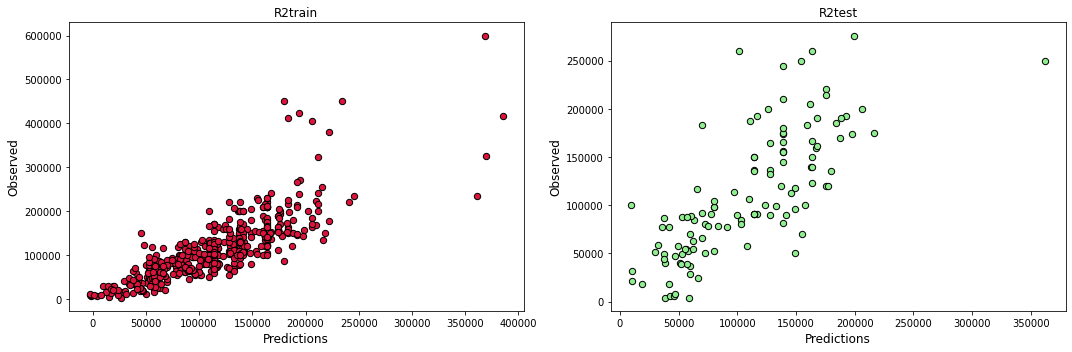

In [ ]:
#Create scatter plots 
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(predictions_in9, tY9 , s=40, c='crimson',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2train")
plt.subplot(1,2,2)
plt.scatter(predictions9, vY9, s=40, c='lightgreen',\
           marker='o', edgecolors='black')
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Observed', fontsize=12)
plt.title("R2test")
plt.tight_layout();

#Conclusions

###No linear correlation between variables in dataset for initial model thus linear regression did not perform well. We did not use clustering or logistic regression models as we did not feel it fit our problem statement. For initial model, tried other techniques like decision tree and random forest. However, we found that the best modeling technique was XGBoost Regressor for this dataset.

###Initial model had low accuracy. Modified the dataset by providing minimum threshold for salary, categorizing remote ratio, and including additional variables for analysis.

###Revised model now has r2=0.56 and 37% accuracy for predicting the salary in USD for data analyst role.
